In [14]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import warnings
import datetime

warnings.filterwarnings('ignore')


In [8]:
data=pd.read_csv('delhivery_data.csv')
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [9]:
data.shape

(144867, 24)

In [10]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [33]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [24]:
data[['destination','dest_state']] = data['destination_name'].str.split('(', n=1, expand=True)
data['dest_state'] = data['dest_state'].str.rstrip(')')
data[['dest_City','dest_place','dest_code']] = data['destination'].str.split('_', n=2, expand=True)
data[['source','source_state']] = data['source_name'].str.split('(', n=1, expand=True)
data['source_state'] = data['source_state'].str.rstrip(')')
data[['source_City','source_place','source_code']] = data['source'].str.split('_', n=2, expand=True)

In [28]:
data.drop(columns=['source', 'destination'], inplace=True)

In [34]:

data['trip_creation_year'] =data['trip_creation_time'].dt.year
data['trip_creation_month'] =data['trip_creation_time'].dt.month_name()
data['trip_creation_day'] =data['trip_creation_time'].dt.day

In [35]:
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,dest_City,dest_place,dest_code,source_state,source_City,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,September,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,September,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,September,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,September,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,2018,September,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Gurgaon,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,September,20
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Gurgaon,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,September,20
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Gurgaon,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,September,20
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,Gurgaon,Bilaspur,HB,Haryana,Sonipat,Kundli,H,2018,September,20


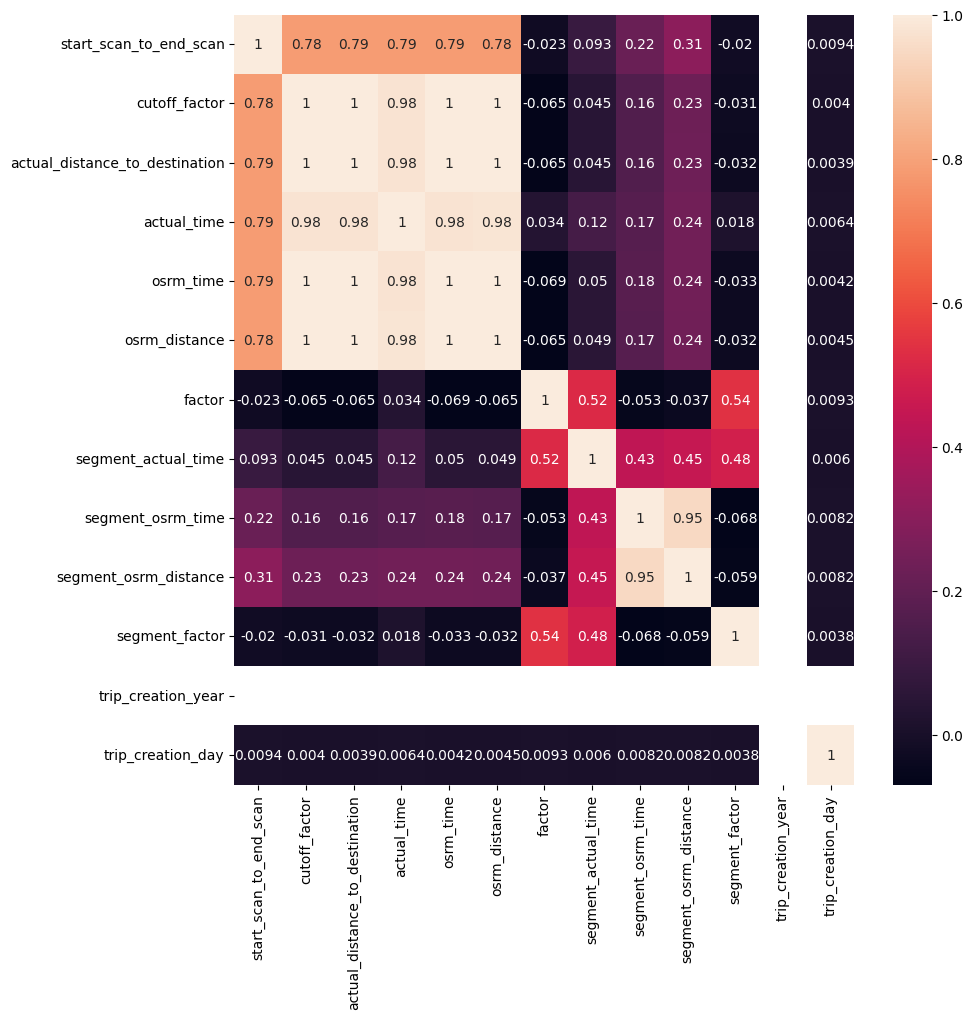

In [36]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

[]

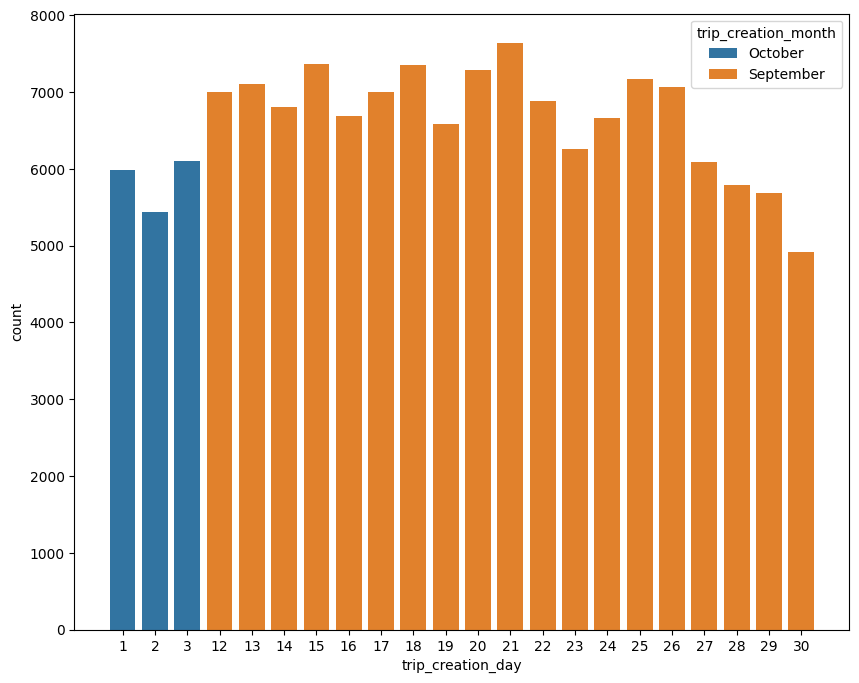

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['trip_creation_day'],hue=data['trip_creation_month'])
plt.plot()

In [23]:
data.groupby(['source_name','destination_name']).agg('mean')['start_scan_to_end_scan']

source_name                      destination_name                        
AMD_Memnagar (Gujarat)           Ahmedabad_East_H_1 (Gujarat)                 76.416667
AMD_Rakhial (Gujarat)            Ahmedabad_East_H_1 (Gujarat)                120.793651
Abohar_DC (Punjab)               Malout_DC (Punjab)                           51.000000
                                 Muktsar_DPC (Punjab)                        739.000000
Achrol_BgwriDPP_D (Rajasthan)    Jaipur_Hub (Rajasthan)                       91.100000
                                                                                ...    
Weir_BsstdDPP_D (Rajasthan)      Kherli_GodamDPP_D (Rajasthan)                89.500000
YamunaNagar_DC (Haryana)         PaontSahib_Gurudwar_D (Himachal Pradesh)    140.916667
Yellandu_Sudimala_D (Telangana)  Rayaparthi_Perkadrd_D (Telangana)           161.250000
Yellareddy_JKRoad_D (Telangana)  Medak_Dwaraka_D (Telangana)                  75.947368
Zahirabad_Mohim_D (Telangana)    Hyderabad_Sha

In [19]:
data.groupby(['route_schedule_uuid','source_name']).count()

data  \
route_schedule_uuid                                source_name                                    
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... Bhiwandi_Mankoli_HB (Maharashtra)         47   
                                                   Mumbai_MiraRd_IP (Maharashtra)            12   
                                                   Mumbai_MiraRoad_M (Maharashtra)            6   
thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3c... Bengaluru_Hoodi_IP (Karnataka)            36   
thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b4... Naugchia_Vijayght_D (Bihar)               12   
...                                                                                         ...   
thanos::sroute:ff9b1c17-a70d-412a-acd1-5ab51d89... Rajamundry_AtoNgrRd_I (Andhra Pradesh)     8   
                                                   Vizag_Gajuwaka_L (Andhra Pradesh)         23   
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... Ludhiana_MilrGanj_HB (Punjab)             55   
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... Aligarh_KhirByps_I (Uttar Pradesh)         6   
                                                   Kasganj_BnkrGate_D (Uttar Pradesh)         1   

                                                                                           trip_creation_time  \
route_schedule_uuid                                source_name                                                  
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... Bhiwandi_Mankoli_HB (Maharashtra)                       47   
                                                   Mumbai_MiraRd_IP (Maharashtra)                          12   
                                                   Mumbai_MiraRoad_M (Maharashtra)                          6   
thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3c... Bengaluru_Hoodi_IP (Karnataka)                          36   
thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b4... Naugchia_Vijayght_D (Bihar)                             12   
...                                                                                                       ...   
thanos::sroute:ff9b1c17-a70d-412a-acd1-5ab51d89... Rajamundry_AtoNgrRd_I (Andhra Pradesh)                   8   
                                                   Vizag_Gajuwaka_L (Andhra Pradesh)                       23   
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... Ludhiana_MilrGanj_HB (Punjab)                           55   
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... Aligarh_KhirByps_I (Uttar Pradesh)                       6   
                                                   Kasganj_BnkrGate_D (Uttar Pradesh)                       1   

                                                                                           route_type  \
route_schedule_uuid                                source_name                                          
thanos::sroute:0007affd-fd01-4cf0-8a4f-90419df0... Bhiwandi_Mankoli_HB (Maharashtra)               47   
                                                   Mumbai_MiraRd_IP (Maharashtra)                  12   
                                                   Mumbai_MiraRoad_M (Maharashtra)                  6   
thanos::sroute:00435307-de7f-4439-bd6a-5a2a9a3c... Bengaluru_Hoodi_IP (Karnataka)                  36   
thanos::sroute:00a74fab-a3ac-44df-b83a-cbf181b4... Naugchia_Vijayght_D (Bihar)                     12   
...                                                                                               ...   
thanos::sroute:ff9b1c17-a70d-412a-acd1-5ab51d89... Rajamundry_AtoNgrRd_I (Andhra Pradesh)           8   
                                                   Vizag_Gajuwaka_L (Andhra Pradesh)               23   
thanos::sroute:ffaf85f1-2f23-4367-aef7-c5804480... Ludhiana_MilrGanj_HB (Punjab)                   55   
thanos::sroute:fffa2622-a170-4d08-b60b-38dfbae8... Aligarh_KhirByps_I (Uttar Pradesh)               6   
                                                   Kasganj_BnkrGate_D (Ut

In [18]:
data['route_schedule_uuid'].value_counts()

thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-6277077ad09e       1
thanos::sroute:e00eb6aa-d792-4b28-81fa-fdee413ef326       1
thanos::sroute:889b9cf5-da6a-48ce-b3bd-6983c8090164       1
thanos::sroute:404cbabf-d2a5-4e46-bf79-8b3c518f082b       1
Name: route_schedule_uuid, Length: 1504, dtype: int64